In [ ]:
# Un equipo internacional de científicos,liderado por
# biólogos de la UCLA,usaron este dendrograma para reportar datos genéticos de más de 900 perros de
# 85 razas -- y más de 200 lobos grises salvajes de alrededor del mundo,incluyendo poblaciones de norte
# América,Europa,el Oriente Medio y Asia Oriental.
# Ellos usaron técnicas moleculares genéticas para analizar más de 48,000 marcadores genéticos.
# Este diagrama,que muestra la agrupación jerárquica de estos animales en función de la similitud en
# sus datos genéticos. 

# 5Los algoritmos de clústeres jerárquicos construyen
# una jerarquía de clústeres en el que cada nodo es un clúster que consta de los clústeres de sus
# nodos hijas.

# Las estrategias para la agrupación jerárquica en general se dividen en dos tipos: Divisivo y Aglomerativo.

# La división es descendente,por lo que se inicia con todas las observaciones en un clúster grande y se dividen
# en partes más pequeñas. Imagina divisivo como "dividir" el clúster.
# El aglomerativo es lo contrario de divisivo,por lo que es de abajo hacia arriba,donde cada observación
# se inicia en su propio clúster y los pares de clústeres se fusionan a medida que avanzan en la jerarquía.

# El enfoque aglomerativo es más popular entre los "Data Scientists",por lo que es el tema
# principal

# El algoritmo se inicia mediante la asignación de cada ciudad a su propio clúster.
# Así que,si tenemos 6 ciudades,tenemos 6 grupos,cada uno conteniendo sólo una ciudad.
# Tomemos nota de cada ciudad mostrando los dos primeros caracteres de su nombre.
# El primer paso es determinar qué ciudades -- vamos a llamarlos grupos a partir de ahora en adelante
# -- se fusionan en un clúster. Usualmente,queremos tomar los dos clústers más cercanos según
# la distancia elegida. Mirando la matriz de distancia,Montreal y
# Ottawa son los clústers más cercanos. Así que,retiramos un cluster de ellos.
# Por favor,observa que sólo se usamos una simple función de distancia unidimensional aquí,pero nuestro objeto puede
# ser multidimensional,y la medición de distancia puede ser Euclidiana,Pearson,distancia promedio,
# o muchas otras,en función del tipo de datos y del conocimiento del dominio.
# De todos modos,tenemos que fusionar estas dos ciudades más cercanas en la matriz de distancias también.
# Por lo tanto,las filas y columnas se fusionan a medida que se construye el clúster.
# Como puedes ver en la matriz de distancia,las filas y las columnas relacionadas con las ciudades de Montreal y Ottawa
# se fusionan a medida que se construye el clúster. En consecuencia,las distancias de todas las ciudades a este
# nuevo clúster fusionado se actualizan. ¿Pero cómo? Por ejemplo,¿cómo calculamos la distancia desde
# el clúster de Winnipeg al de Ottawa-Montreal? Bueno,hay diferentes alcances,pero
# Supongamos,por ejemplo,que acabamos de seleccionar la distancia desde el centro del clúster de Otawa-Montreal
# hacia Winnipeg. Actualizando la matriz de distancia,ahora tenemos
# un clúster menos. A continuación,buscamos los clústeres más cercanos una vez
# más. En este caso,Ottawa-Montreal y Toronto
# son los más cercanos,lo que crea otro clúster.
# En el siguiente paso,la distancia más cercana es entre el clúster de Vancouver y el clúster de Edmonton
# Formando un nuevo clúster,sus datos en la matriz
# la tabla se actualizan. Esencialmente,las filas y las columnas se fusionan
# a medida que se fusionan los clústeres y se actualiza la distancia.
# Esta es una forma común de implementar este tipo de clustering,y tiene el beneficio de almacenar caché
# de las distancias entre clústeres.
# De la misma manera,el algoritmo aglomerativo procede luego de una fusión de clústeres.
# Y lo repetimos hasta que todos los clústeres se fusionen y el árbol se complete.
# Significa,hasta que todas las ciudades están agrupadas en un solo clúster de tamaño 6.
# La agrupación jerárquica se visualiza normalmente como un dendrograma tal como se muestra en esta diapositiva.
# Cada fusión se representa mediante una línea horizontal.
# La coordenada y de la línea horizontal es la similaridad de los dos clústeres que se
# se fusionaron,donde las ciudades se vean como clústeres de una sola instancia.
# Al subir desde la capa inferior hasta el nodo superior,un dendrograma nos permite reconstruir
# el historial de fusiones que ha resultado en la agrupación en clústeres representados.
# Esencialmente,la agrupación jerárquica jerárquica no requiere un número de clústeres preespecificado.
# Sin embargo,en algunas aplicaciones queremos una partición de clústeres disjuntos,como en el agrupamiento plano.
# En estos casos,la jerarquía tiene que ser recortada en algún momento.
# Por ejemplo,aquí,reduciendo un nivel específico de similitud,creamos 3 clústeres de ciudades similares.

In [ ]:
# El algoritmo Aglomerativo para el clustering jer�rquico.
# Recuerde que el clustering aglomerativo es un enfoque de abajo arriba.
# Digamos que nuestro dataset tiene puntos de datos. En primer lugar,queremos crear n clusteres,uno para
# cada punto de datos. A continuaci�n,cada punto se asigna como un cluster.

# Echemos un vistazo al algoritmo Aglomerativo para el clustering jer�rquico.
# Recuerde que el clustering aglomerativo es un enfoque de abajo arriba.
# Digamos que nuestro dataset tiene puntos de datos. 

# En primer lugar,queremos crear n clusteres,uno para
# cada punto de datos. A continuaci�n,cada punto se asigna como un cluster.
# A continuaci�n,queremos calcular la matriz de distancia/proximidad,que ser� n por n en la tabla.
# Despu�s de esto,queremos ejecutar de forma iterativa los pasos siguientes hasta que el n�mero de cluster especificado
# sea alcanzado,o hasta que s�lo quede un cluster.

# En primer lugar,MERGE los dos grupos m�s cercanos. (Las distancias se calculan ya en la matriz de proximidades.)
# En segundo lugar,UPDATE la matriz de proximidad con los nuevos valores.
# Nos detenemos despu�s de que hayamos alcanzado el n�mero especificado de clusteres,o s�lo hay un cluster
# que queda,con el resultado almacenado en un dendrograma. 

# As� que,en la matriz de proximidad,tenemos que medir
# las distancias entre clusteres,y tambi�n fusionar los clusteres que son "m�s cercanos".
# Por lo tanto,la operaci�n clave es la computaci�n de la proximidad entre los clusteres con un punto
# ,y tambi�n clusteres con varios puntos de datos.

# En este punto hay una serie de cuestiones clave que deben ser respondidas.
# Por ejemplo,"�C�mo se miden las distancias entre estos clusteres y c�mo definimos
# el 'm�s cercano ' entre los clusteres?" Tambi�n podemos preguntar,"�Qu� puntos usamos?"

# En primer lugar,vamos a ver c�mo calcular la distancia entre 2 clusteres con 1 punto cada uno.
# Supongamos que tenemos un conjunto de datos de pacientes,y queremos que los agrupen usando clustering
# jer�rquico. Por lo tanto,nuestros puntos de datos son pacientes,con una funci�n
# conjunto de 3 dimensiones. Por ejemplo,Age,Body Mass Index (o BMI),
# y Presi�n de Sangre. Podemos usar diferentes medidas de distancia
# para calcular la matriz de proximidad. Por ejemplo,la distancia euclidiana.
# As� que,si tenemos un dataset de n pacientes,podemos construir una n por n dissimilar-distancia
# matriz. Nos dar� la distancia de las agrupaciones con
# 1 punto de datos. Sin embargo,tal como se ha mencionado,fusionamos los clusteres en
# clustering aglomerativo. 

# Ahora,la pregunta es: "¿
# Como podemos calcular
# la distancia entre los clusteres cuando hay varios pacientes en cada cluster?"
# Podemos utilizar diferentes criterios para encontrar los clusteres m�s cercanos,y fusionarlos.
# En general,depende completamente del tipo de datos,la dimensionalidad de los datos,y lo m�s importante,
# el conocimiento de dominio del dataset. De hecho,diferentes enfoques a la hora de definir
# la distancia entre clusteres,distinguir los diferentes algoritmos.
# Como pueden imaginarse,hay m�ltiples maneras de hacerlo.

# El primero se denomina Clustering de enlace Unico. El enlace Unico se define como la distancia
# mas corta entre 2 puntos en cada cluster,como,por ejemplo,"a" y "b".

# El siguiente es un Complete-Linkage Clustering. Esta vez,estamos encontrando la distancia mas larga
# entre los puntos de cada cluster,como la distancia entre el punto "a" y el "b".

# El tercer tipo de enlace es el clustering promedio de enlaces,o la distancia media.

# Esto significa que estamos viendo la distancia promedio de cada punto de un cluster a
# cada uno de los puntos de otro cluster. El tipo de enlace final que se debe revisar es el clustering
# de enlaces centroide. Centroide es el promedio de los conjuntos de caracter�sticas
# de puntos en un cluster. 

# Este enlace tiene en cuenta el centroide
# de cada cluster al determinar la distancia m�nima.
# Hay 3 ventajas principales para utilizar el clustering jer�rquico.
# En primer lugar,no es necesario especificar el numero de clusteres necesarios para el algoritmo.
# En segundo lugar,el clustering jerarquico es facil de implementar.
# Y en tercer lugar,el dendrograma producido es muy util para comprender los datos.

# Tambien hay algunas desventajas. En primer lugar,el algoritmo nunca puede deshacer ninguna de los pasos
# anteriores. Asi por ejemplo,el algoritmo agrupa 2 puntos,
# y mas tarde vemos que la conexio no era buena,el programa no puede deshacer ese
# paso. En segundo lugar,la complejidad del tiempo para el clustering
# puede dar lugar a tiempos de calculo muy largos,en comparacion con algoritmos eficientes,como
# K-Means. Por �ltimo,si tenemos un conjunto de datos grande,puede
# ser dif�cil determinar el n�mero correcto de clusteres por el dendrograma.

# Ahora,comparemos el clustering jer�rquico con la k-Means.

# Los K-means son m�s eficientes para los datasets grandes. En contraste con la k-Means,el clustering jer�rquico
# no requiere que se especifique el n�mero de clusteres.
# El clustering jer�rquico da m�s de un particionamiento en función de la resolución,
# Mientras que k-Means s�lo da un solo particionamiento de los datos.
# El clustering jer�rquico siempre genera los mismos clusteres,en contraste con la k-Means que
# devuelve distintos clusteres cada vez que se ejecuta debido a la inicialización aleatoria de los centroides.

In [ ]:
# Laboratorio

# Clustering Jerárquico - Aglomerativo
# Estaremos viendo la técnica de clustering, la cual es Clustering Jerárquico Aglomerativo. 
# Recuerda que este enfoque, el aglomerativo, es un enfoque de abajo hacia arriba (bottom up).

# En este laboratorio, estaremos observando Clustering Aglomerativo, 
# el cual es más popular que el Clustering Divisivo.

# También estaremos utilizando Enlace Completo como el Criterio de Enlaces.
# NOTA: Puedes también intentar usar Enlaces Promedio donde el Enlace Completo 
# sería usando, de esta forma, ¡verás la diferencia!

In [3]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

In [9]:
# Generando los Datos Aleatorios
# Estaremos generando un conjunto de datos usando la clase make_blobs.

# Ingresa estos parámetros dentro de make_blobs:

# n_samples: Total de puntos divididos equitativamente entre los clusters.
# Elegir un número entre 10-1500
# centers: El número de centros para generar, o las ubicaciones de centro fijas.
# Elegir arreglas de coordenadas x,y para generar los centros. Tienes centros entre 1-10 (ej. centers=[[1,1], [2,5]])
# cluster_std: El desvío estándar de los clusters. Mientras más grande el número, más separados estarán los clusters.
# Elegir un número entre 0.5-1.5

X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)

In [22]:
X1[0:5]

array([[-1.64242818, -1.35011766],
       [ 3.64587823,  5.61073212],
       [ 8.87331893,  3.48590354],
       [ 4.34829571,  4.05080844],
       [-2.68442111, -0.05698131]])

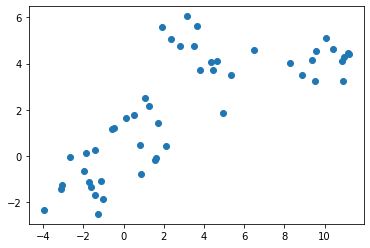

In [26]:
plt.scatter(X1[:, 0], X1[:, 1], marker='o')
# en este modelo de clusterin jeraruico solo se tienen variables independientes

In [32]:
# Clustering Aglomerativo
# Comenzaremos haciendo el clustering de los datos aleatorios de los puntos que recién creamos.

# The La clase de Clustering Aglomerativo necesita dos entradas:

# n_clusters: El número de clusters a formar y el número de centroides a generar.
# Value will be: 4
# linkage: Criterio de Enlace a utilizar. El criterio de enlace determina 
# la distancia a usar entre varias observaciones. El algoritmos agrupará 
# en pares los clusters que minimizarán este criterio.
# El valor será: 'complete'
# Note: Se recomienda también intentar todo con 'average'

# Guarda el resultado en una variable llamada agglom
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average')
agglom.fit(X1,y1)

AgglomerativeClustering(linkage='average', n_clusters=4)

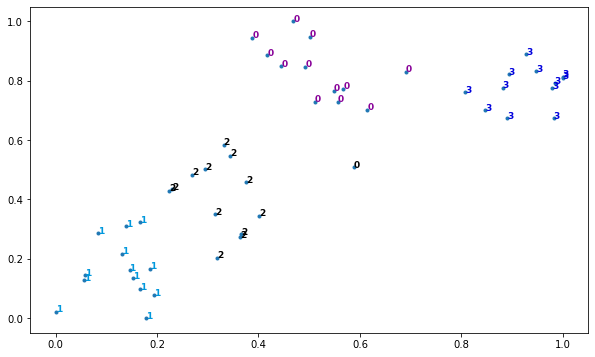

In [36]:
# Crear una figura de 6 pulgadas (aprox 15cm) por 4 pulgadas (aprox 10 cm).
plt.figure(figsize=(10,6))

# Estas dos líneas de código se usan para reducir los puntos de datos,
# porque sino los puntos de datos se verían muy separados y dispersos.

# Crear un rango mínimo y máximo de X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Obtener la distancia promedio para X1.
X1 = (X1 - x_min) / (x_max - x_min)

# Este loop muestra todos los puntos de datos.
for i in range(X1.shape[0]):
    # Reemplaza los puntos de datos con su valor de cluster respectivo 
    # (ej. 0) está codificado con un mapa de colores (plt.cm.spectral)
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
    
# Elimina los ticks x, ticks y, y los ejes x e y
# plt.xticks([])
# plt.yticks([])
#plt.axis('off')



# Muestra el punteado de los datos originales ántes de clustering
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Muestra el punteo
plt.show()

In [41]:
# Dendograma Asociado al Clustering Aglomerativo Jerárquico.

# Recuerda que una matriz de distancia contiene la distancia de 
# cada punto hacia cualquier otro punto del set de datos .
# Usa la función distance_matrix, la cual necesita dos entradas. 
# Usa la Matriz de Confusión, X2 como ambas entradas para guardar la 
# matriz de distancia en una variable de nombre dist_matrix

# Recuerda que los valores de distancia son simétricos, con una diagonal de ceros. 
# Esta es una forma de asegurarse que tu matriz es correcta.
# (imprime dist_matrix para asegurarte que es correcta)
dist_matrix = distance_matrix(X1,X1) 
dist_matrix[0:1]

array([[0.        , 0.88588389, 0.89532096, 0.74527591, 0.16616108,
        0.76128882, 0.13706955, 0.84352713, 0.17480805, 0.25192586,
        0.91436335, 0.39282005, 0.36787793, 0.09455835, 0.03992055,
        0.07057979, 0.18905769, 0.98857725, 0.02721486, 0.25941105,
        0.0977483 , 0.32543967, 1.01031763, 0.48357677, 0.30299626,
        1.04543741, 0.69380332, 1.05979851, 0.19051428, 0.78913409,
        0.39328231, 1.08507351, 1.08242595, 0.45493308, 0.73163571,
        0.90647789, 0.04676607, 0.71882718, 0.17889484, 0.57379364,
        1.08175473, 0.7710255 , 0.87971888, 0.08582422, 0.30890579,
        0.26878427, 0.79625589, 1.05772532, 0.92114766, 0.97105803]])

In [43]:
# Usando la clase de enlace de la jerarquía, pasa los parámetros:
# La matriz de distancia'completa' se refiere al enlace completo
# Guarda el resultado en una variable de nombre Z

Z = hierarchy.linkage(dist_matrix, 'complete')

<ipython-input-43-7b361e293660>:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'complete')


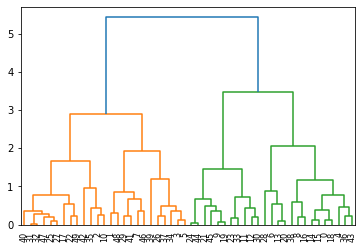

In [44]:
# Un clustering jerárquico se visualiza como un dendograma 
# como se muestra en la siguiente celda. Cada agrupamiento 
# se representa por una linea horizontal. La coordenada y 
# de la linea horizontal se refiere a la similitud entre dos 
# clusters que se agruparon, donde las ciudades se visualizan 
# como clusters individuales. Moviéndose para arriba desde la capa 
# inferior hacia el nodo superior,un dendograma nos permite reconstruir 
# la historia de agrupamientos que resultaron en el clustering representado.

# Luego, guardaremos el dendograma en una variable llamada dendro. 
# Al hacer esto, el dendograma también se dibujará. Utilizando la 
# clase dendrograma de la jerarquía, se pasa en el parámetro: Z
dendro = hierarchy.dendrogram(Z)

<ipython-input-45-b0843dc14621>:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'average')


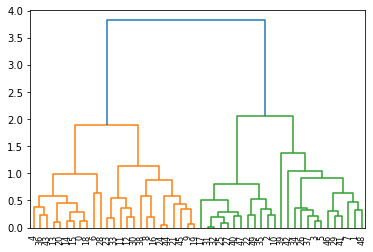

In [45]:
# Práctica
# Usamos enlace completo en nuestro caso, lo cambiamos a enlace promedio para ver cómo un dendograma cambia.

Z = hierarchy.linkage(dist_matrix, 'average')
dendro = hierarchy.dendrogram(Z)

In [ ]:
# Ejercicio 2.

# Agrupando el dataset Vehículo.

# Imagina que una fábrica de vehículos desarrolló prototipos para un 
# nuevo vehículo. Antes de presentar el nuevo modelo, el fabracante 
# quiere saber que vehículos existen en el mercado similares al prototipo--
# es decir, cómo se pueden agrupar los vehículos, qué grupo es el más parecido 
# al del modelo y de esta forma, qué modelos competirán con el nuevo.

# Nuestro objetivo es utilizar métodos de clustering para encontrar los clusters 
# más diferentes de vehículos. Se resumirán los vehículos actuales y ayudará al 
# proceso de fabricación para tomar mejores decisiones para hacer modelos más simples.

# Descargar los datos
# Para descargar los datos, usaremos !wget desde IBM Object Storage.
# ¿Sabías? Cuando se trata de Machine Learning, seguro trabajarás con 
# grandes datasets (juego de datos). Entonces, ¿dónde podrás guardar 
# esos datos? IBM ofrece una oportunidad única para las empresas, 
# con 10 Tb de IBM Cloud Object Storage: Registrate ahora gratuitamente

In [64]:
filename = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cars_clus.csv'
#Read csv
pdf = pd.read_csv(filename)
print ("Forma del set de datos: ", pdf.shape)
pdf.head(5)

Forma del set de datos:  (159, 16)


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


In [65]:
# Limpieza de Datos
# limpiemos el set de datos eliminando filas que tienen valores nulos:
print ("Shape of dataset before cleaning: ", pdf.size)
pdf[[ 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']] = pdf[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')

# pandas.to_numeric(arg, errors= , downcast=)


Shape of dataset before cleaning:  2544


In [131]:
# Selección de Característica
# Elijamos nuestro conjunto en cuestión:

featureset = pdf[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]

In [132]:
featureset.head(5)

,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg
0,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0
1,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0
2,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0
3,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0
4,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0


In [170]:
# missing_data = featureset.isnull()
# missing_data.head(5)

In [171]:
# for column in missing_data.columns.values.tolist():
#     print(column)
#     print (missing_data[column].value_counts())
#     print("") 

In [172]:
#Finalmente, eliminemos todas las filas que no tienen información 
# elimina toda la fila con NaN en la columna "mpg"

featureset.dropna(subset=["engine_s"], axis=0, inplace=True)
featureset.dropna(subset=["horsepow"], axis=0, inplace=True)
featureset.dropna(subset=["wheelbas"], axis=0, inplace=True)
featureset.dropna(subset=["width"], axis=0, inplace=True)
featureset.dropna(subset=["length"], axis=0, inplace=True)
featureset.dropna(subset=["curb_wgt"], axis=0, inplace=True)
featureset.dropna(subset=["fuel_cap"], axis=0, inplace=True)
featureset.dropna(subset=["mpg"], axis=0, inplace=True)

# # restablece el índice debido a que eliminamos dos filas
featureset.reset_index(drop=True, inplace=True)

<ipython-input-172-93173e1346f9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  featureset.dropna(subset=["engine_s"], axis=0, inplace=True)
<ipython-input-172-93173e1346f9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  featureset.dropna(subset=["horsepow"], axis=0, inplace=True)
<ipython-input-172-93173e1346f9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  featureset.dropna(subset=["wheelbas"], axis=0, inplace=True)
<ipython-i

In [173]:
# missing_data = featureset.isnull()
# for column in missing_data.columns.values.tolist():
#     print(column)
#     print (missing_data[column].value_counts())
#     print("") 

In [174]:
# Normalización.

# Ahora podemos normalizar el set. MinMaxScaler transforma 
# poniendo en escala a un rango. Por omisión es (0, 1). 
# Es decir, las escalas de estimación se traducen 
# cada una individualmente de forma tal de quedar entre cero y uno.
# class sklearn.preprocessing.MinMaxScaler(feature_range=0, 1, *, copy=True, clip=False)

from sklearn.preprocessing import MinMaxScaler
x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx 

array([[0.11428571, 0.21518987, 0.18655098, ..., 0.20233886, 0.13364055,
        0.41935484],
       [0.31428571, 0.43037975, 0.3362256 , ..., 0.44112048, 0.31797235,
        0.32258065],
       [0.31428571, 0.43037975, 0.31019523, ..., 0.42833832, 0.31797235,
        0.35483871],
       ...,
       [0.27142857, 0.36962025, 0.37527115, ..., 0.46369323, 0.49769585,
        0.29032258],
       [0.07142857, 0.05316456, 0.29718004, ..., 0.28202339, 0.07373272,
        1.        ],
       [0.35714286, 0.2835443 , 0.37310195, ..., 0.71063367, 0.31797235,
        0.35483871]])

In [175]:
# Agrupando utilizando Scipy¶
# # En esta parte, usaremos el paquete Scipy para agrupar el set de datos:
# # Primero, calcularemos la matriz de distancia.

import scipy
leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

<ipython-input-175-c6e7f82f8fa3>:7: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  D = scipy.zeros([leng,leng])


In [176]:
# En el clustering aglomerativo, en cada iteración, el algoritmo debe actualizar la matriz 
# para refrejar la distancia del nuevo cluster formado a partir de los clusters restantes. 
# Los métodos siguientes los soporta Scipy para calcular la distancia entre los 
# recientementes formados clusters y para cada:

# - simple
# - completo
# - promedio
# - ponderado
# - centroide
# Usaremos completo para nuestro caso, pero si deseas puedes cambiar para ver los diferentes resultados.

In [177]:
import pylab
import scipy.cluster.hierarchy
Z = hierarchy.linkage(D, 'complete')
Z

<ipython-input-177-884ddba27f19>:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(D, 'complete')


array([[4.20000000e+01, 1.12000000e+02, 4.92152852e-03, 2.00000000e+00],
       [3.30000000e+01, 1.10000000e+02, 1.05111047e-02, 2.00000000e+00],
       [1.41000000e+02, 1.45000000e+02, 1.42210988e-02, 2.00000000e+00],
       [2.40000000e+01, 1.32000000e+02, 2.16424814e-02, 2.00000000e+00],
       [3.00000000e+01, 1.11000000e+02, 4.89725918e-02, 2.00000000e+00],
       [4.80000000e+01, 8.60000000e+01, 5.01829206e-02, 2.00000000e+00],
       [1.47000000e+02, 1.48000000e+02, 5.04919144e-02, 2.00000000e+00],
       [8.80000000e+01, 1.01000000e+02, 6.75094118e-02, 2.00000000e+00],
       [1.49000000e+02, 1.50000000e+02, 7.38225377e-02, 2.00000000e+00],
       [1.09000000e+02, 1.19000000e+02, 1.21674195e-01, 2.00000000e+00],
       [2.20000000e+01, 1.16000000e+02, 1.55214694e-01, 2.00000000e+00],
       [4.90000000e+01, 8.70000000e+01, 1.65976071e-01, 2.00000000e+00],
       [4.60000000e+01, 8.50000000e+01, 1.71231947e-01, 2.00000000e+00],
       [1.25000000e+02, 1.26000000e+02, 1.84187963e

In [178]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([ 4,  1,  1,  1,  6,  3, 13,  6,  6,  1,  1,  1,  3,  3,  3,  3,  1,
       10,  4,  6,  1,  1,  1,  2,  4,  9,  1,  6,  6,  3,  6,  3,  3,  4,
        6,  6, 11, 10, 12, 10, 13, 13,  3,  4,  1,  6,  1,  4, 13,  3, 13,
       12,  1, 10,  4,  6,  6,  1,  3,  7,  4,  6,  1,  1,  8,  5,  1,  1,
        1,  3,  3, 12,  1,  3, 13, 10,  4,  6,  6,  1,  1,  3,  5,  6,  6,
        1, 13,  3,  3,  6,  1, 13,  2,  4,  4,  6, 13,  3,  4,  6,  1,  3,
        1,  1,  1,  6,  6,  3,  1,  3,  4,  6,  3,  2,  6,  6,  1,  1,  3,
        3,  5,  5,  5,  6,  6,  4,  4,  4,  6,  6,  6,  6,  4,  6,  1,  4,
        4,  3,  4,  6, 12,  4,  4,  6,  4,  4,  4,  6,  6,  6,  6,  1,  1,
        7,  3], dtype=int32)

In [179]:
# Escencialmente, el clustering jerárquico no necesita de un número específico de clusters. 
# Sin embargo, algunas aplicaciones que queremos una partición de clusters disjuntos como si 
# fueran clustering tradicional. Por lo tanto podrás usar una linea en el medio:

import pylab
import scipy.cluster.hierarchy
Z = hierarchy.linkage(D, 'complete')

<ipython-input-179-6bd64650f97b>:7: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(D, 'complete')


In [180]:
# Escencialmente, el clustering jerárquico no necesita de un número específico de clusters. 
# Sin embargo, algunas aplicaciones que queremos una partición de clusters disjuntos como si 
# fueran clustering tradicional. Por lo tanto podrás usar una linea en el medio:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([ 4,  1,  1,  1,  6,  3, 13,  6,  6,  1,  1,  1,  3,  3,  3,  3,  1,
       10,  4,  6,  1,  1,  1,  2,  4,  9,  1,  6,  6,  3,  6,  3,  3,  4,
        6,  6, 11, 10, 12, 10, 13, 13,  3,  4,  1,  6,  1,  4, 13,  3, 13,
       12,  1, 10,  4,  6,  6,  1,  3,  7,  4,  6,  1,  1,  8,  5,  1,  1,
        1,  3,  3, 12,  1,  3, 13, 10,  4,  6,  6,  1,  1,  3,  5,  6,  6,
        1, 13,  3,  3,  6,  1, 13,  2,  4,  4,  6, 13,  3,  4,  6,  1,  3,
        1,  1,  1,  6,  6,  3,  1,  3,  4,  6,  3,  2,  6,  6,  1,  1,  3,
        3,  5,  5,  5,  6,  6,  4,  4,  4,  6,  6,  6,  6,  4,  6,  1,  4,
        4,  3,  4,  6, 12,  4,  4,  6,  4,  4,  4,  6,  6,  6,  6,  1,  1,
        7,  3], dtype=int32)

In [181]:
# También, podrás determinar la cantidad de clusters directamente:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(Z, k, criterion='maxclust')
clusters


array([2, 1, 1, 1, 2, 1, 5, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 2, 1, 1,
       1, 1, 2, 3, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 4, 4, 5, 4, 5, 5, 1, 2,
       1, 2, 1, 2, 5, 1, 5, 5, 1, 4, 2, 2, 2, 1, 1, 3, 2, 2, 1, 1, 3, 2,
       1, 1, 1, 1, 1, 5, 1, 1, 5, 4, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 5, 1,
       1, 2, 1, 5, 1, 2, 2, 2, 5, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 1, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 3,
       1], dtype=int32)

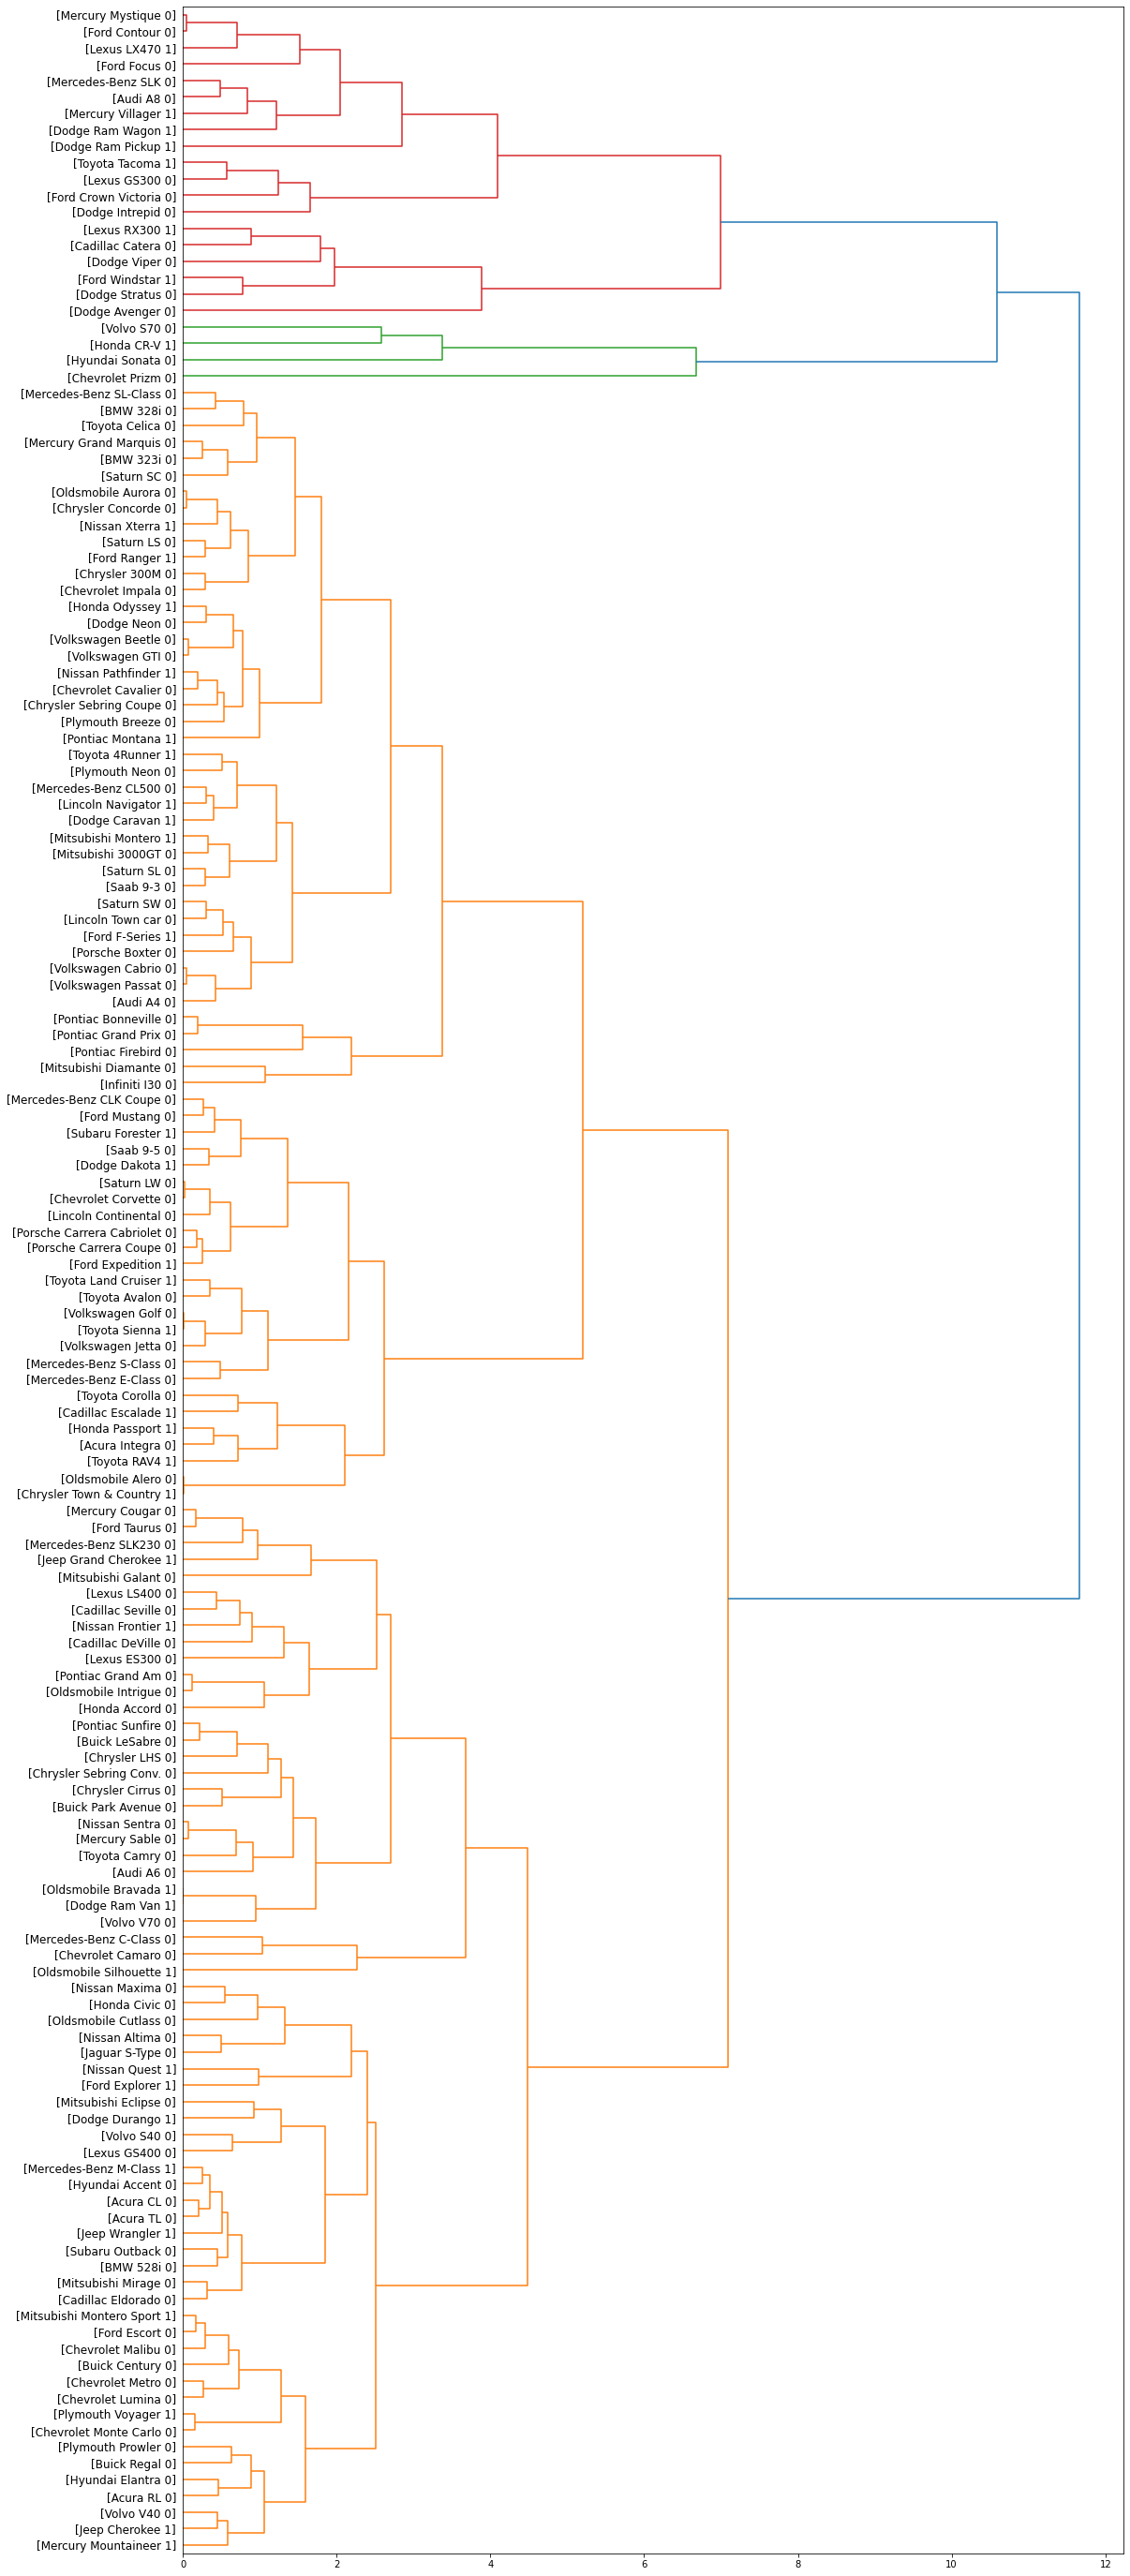

In [182]:
# Ahora, se trazará el dendograma:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (pdf['manufact'][id], pdf['model'][id], int(float(pdf['type'][id])) )
    
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')